# Predicting the 2023 World Series Winner: A Data-Driven Analysis using FanGraphs Statistics

# Introduction

As an avid baseball fan and data enthusiast, I wanted to perform a data-driven analysis to predict the winner of the 2023 World Series. For this project, I will be looking at FanGraphs statistics, spanning from 2003 to 2022, to gain insights and make an informed prediction.

Baseball is a sport steeped in statistics, offering a repository of data that can be leveraged to make insightful forecasts. I want to provide a detailed account of my data science process for this project, covering essential steps including data acquisition, cleaning, formatting, exploratory data analysis (EDA), feature selection, model development, and performance evaluation. By the end of this exploration, I hope to determine the most accurate model for predicting the 2023 World Series winner.

# Baseball Overview

The primary objective in baseball is for a team to score more runs than the opposing team. Here's how it works:

**Scoring Runs:** To score a run, a player from the batting team must successfully advance through all the bases and touch home plate. This is typically achieved through a combination of hitting, stealing bases, and heads-up base running.

**Pitching:** The pitcher's objective is to strikeout the batter, induce them to hit the ball into play to be fielded into an out, or more generally: prevent them from reaching base.

**Batting:** The batter's goal is to hit the pitched ball and safely reach base. Batters can achieve this by hitting the ball into fair territory and running to first base on a single, second base on a double, third base on a triple, and rounding all of the bases on a home run.

**Base Running:** Runners on base aim to advance around the bases while the ball is in play. They can advance on hits, walks, and other actions, such as base stealing or a wild pitch. Base runners must tag the base they are occupying when a fielder has the ball, and they can be tagged out if they are not on a base.

**Defense:** Fielders aim to prevent the batting team from scoring runs. Fielders, including the pitcher and catcher, work together to catch or field the ball, tag runners out, and make plays.

**Divisions and Rankings:** In total, there are 30 MLB teams. 15 are in the National League and 15 are in the American League. Both the National and American Leagues have three divisions consisting of five teams each: the East, the Central, and the West. The teams are ranked 1-5 based on the number of games they've won and lost. A team's divisional ranking is what will determine if they go to playoffs, and ultimately, the World Series.

As we continue exploring baseball data, keep in mind these fundamental aspects of the sport. At the end of the day, we want the model to be simple and understandable, yet accurate. To sum it up, get on base to score runs, and pitch to prevent base runners. Simply put, that's how you win a baseball game, and I will use statistics that reflect that to predict the 2023 World Series winner.

# Data Acquisition

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">For this project, I created a custom Python script to acquire baseball statistics from FanGraphs and organize them into a tidy DataFrame. The script employs web scraping methods to fetch data for all Major League Baseball (MLB) teams from the 2003-2022 seasons. The statistics from the 2003-2022 seasons will be used as the training data for predicting the 2023 World Series winner. 

<br><br>Now you may be wondering, wouldn't I want to go much further back to obtain more samples to include in my training data? Well, the reason I didn't is simple: certain defensive statistics I am interested in did not exist before 2003.

<br><br>Towards the end of the notebook when I run the final model, I will provide a web scraping script that will capture the latest 2023 FanGraphs statistics that will be used as the test data.</span>
</div>

# Exploratory Data Analysis (EDA)

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">First things first, let's take a look at the DataFrame to get an idea of what sort of data we are dealing with, feature names, and some summary statistics.</span>
</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fangraphs-data-2003-2022/Fangraphs Master.csv


In [2]:
# Let's look at the structure of the DataFrame

import pandas as pd

train_data_file_path = '/kaggle/input/fangraphs-data-2003-2022/Fangraphs Master.csv'
train_data = pd.read_csv(train_data_file_path)
train_data.head()

,Team,Season,League,Division,SB,BB%,K%,ISO,BABIP,AVG,...,Fielding_RngR,Fielding_ErrR,Fielding_UZR,Fielding_UZR/150,Fielding_Def,W-L%,Rank,Run Differential,Games Back,WS_Win
0,Arizona Diamondbacks,2003,National,West,76,8.5,16.1,0.153,0.295,0.263,...,-41.9,1.8,-66.0,-8.9,-64.0,0.519,3,32,16.5,False
1,Atlanta Braves,2003,National,East,68,8.5,14.6,0.192,0.302,0.284,...,15.1,-12.8,13.0,1.8,12.0,0.623,1,167,0.0,False
2,Baltimore Orioles,2003,American,East,89,6.9,14.5,0.138,0.293,0.268,...,-10.9,2.7,-13.4,-1.5,-17.4,0.438,4,-77,30.0,False
3,Boston Red Sox,2003,American,East,88,9.5,14.4,0.202,0.307,0.289,...,-46.0,-4.6,-55.7,-6.0,-55.7,0.586,2,152,6.0,False
4,Chicago Cubs,2003,National,Central,73,8.0,18.7,0.157,0.297,0.259,...,32.3,-1.6,19.7,2.1,23.7,0.543,1,41,0.0,False


In [3]:
# Show summary statistics

train_data.describe()

,Season,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,...,Fielding_DRS,Fielding_RngR,Fielding_ErrR,Fielding_UZR,Fielding_UZR/150,Fielding_Def,W-L%,Rank,Run Differential,Games Back
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000
mean,2012.500000,86.686667,8.356667,19.689167,0.156765,0.296985,0.256202,0.324180,0.412950,0.320345,...,-0.400000,-0.000500,0.315167,0.322000,0.028667,-0.141500,0.499987,3.00000,0.000000,13.978333
std,5.771093,31.772698,1.006036,2.990692,0.021091,0.011585,0.013288,0.014237,0.027139,0.015127,...,52.479967,37.620904,9.395524,43.205597,4.650616,44.121159,0.074731,1.43879,111.311427,12.250769
min,2003.000000,14.000000,6.300000,13.100000,0.104000,0.245000,0.212000,0.281000,0.335000,0.277000,...,-175.000000,-227.300000,-26.200000,-237.200000,-22.100000,-239.200000,0.265000,1.00000,-337.000000,0.000000
25%,2007.750000,64.750000,7.700000,17.400000,0.141000,0.290000,0.247000,0.315000,0.394000,0.310000,...,-34.000000,-21.200000,-6.025000,-26.500000,-3.000000,-27.725000,0.444000,2.00000,-82.000000,2.000000
50%,2012.500000,85.000000,8.300000,19.600000,0.155000,0.296000,0.257000,0.323000,0.412000,0.320500,...,0.000000,-0.350000,0.700000,-0.200000,0.200000,0.750000,0.500000,3.00000,1.000000,12.000000
75%,2017.250000,108.000000,9.000000,21.800000,0.171000,0.305000,0.265000,0.333000,0.431000,0.330250,...,35.250000,22.750000,6.825000,27.500000,2.900000,25.800000,0.556000,4.00000,80.000000,22.250000
max,2022.000000,200.000000,11.400000,27.300000,0.227000,0.332000,0.290000,0.366000,0.495000,0.365000,...,142.000000,156.000000,23.800000,148.400000,15.600000,153.300000,0.717000,6.00000,334.000000,61.000000


In [4]:
# Check the dataset for any missing values

Is_there_missing_data = train_data.isnull().any().any()
Is_there_missing_data

False

In [5]:
# Check total amount of rows and columns

train_data.shape

(600, 51)

In [6]:
# Let's check the data types included in the DataFrame

train_data.dtypes

Team                 object
Season                int64
League               object
Division             object
SB                    int64
BB%                 float64
K%                  float64
ISO                 float64
BABIP               float64
AVG                 float64
OBP                 float64
SLG                 float64
wOBA                float64
wRC+                  int64
BsR                 float64
Off                 float64
Def                 float64
WAR                 float64
S_Pitcher_K%        float64
S_Pitcher_BB%       float64
S_Pitcher_HR/9      float64
S_Pitcher_BABIP     float64
S_Pitcher_LOB%      float64
S_Pitcher_GB%       float64
S_Pitcher_HR/FB     float64
S_Pitcher_ERA       float64
S_Pitcher_FIP       float64
S_Pitcher_xFIP      float64
S_Pitcher_WAR       float64
R_Pitcher_K%        float64
R_Pitcher_BB%       float64
R_Pitcher_HR/9      float64
R_Pitcher_BABIP     float64
R_Pitcher_LOB%      float64
R_Pitcher_GB%       float64
R_Pitcher_HR/FB     

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">It can be seen that the dependent variable, WS_Win, has a binary classification where False indicates a team did NOT win a World Series and True indicates they DID win a world series. Since we have 20 years of data here, we know there should be 20 Trues in the WS_Win column. 

<br><br>The Rank feature is ordinal in nature, containing a value of 1-6 (where 1 is a team being in first place in their division). The reason Rank is 1-6 and not 1-5, is because there was one year where there was a league realignment, so one division had six teams instead of five.

<br><br>The rest of the baseball statistics are continuous variables.

<br><br>NOTE: Binary classification problems require specific modeling techniques designed to predict one of two classes. Common algorithms for binary classification include Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVMs). So that is where I'll focus some attention. Another thing to consider is that I want to predict probabilities of the teams winning the World Series, so let's keep model calibration in the back of our minds (such as for Random Forests and SVMs).</span>
</div>

## Analyzing the Offensive Statistics

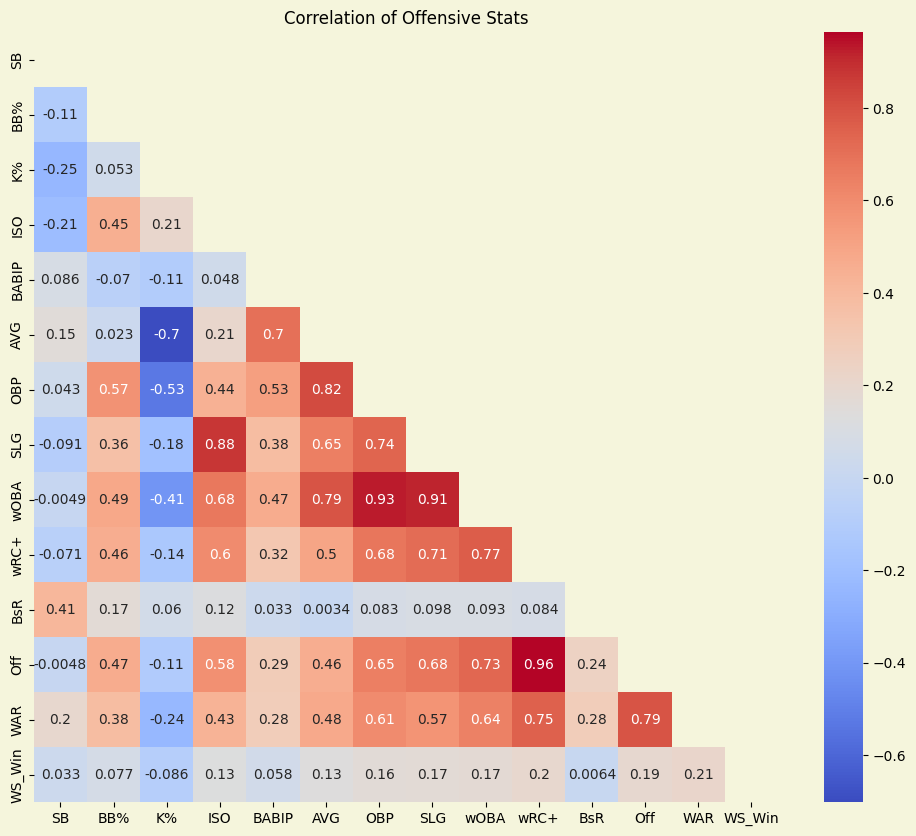

In [7]:
# Let's breakout and analyze the offensive statistics (batting and base running)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

offensive_stats = train_data[['SB', 'BB%', 'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'WAR', 'WS_Win']]

# Scale features and convert back to a DataFrame
scaler = StandardScaler()
offensive_stats = scaler.fit_transform(offensive_stats)
offensive_stats = pd.DataFrame(offensive_stats, columns=['SB', 'BB%', 'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'WAR', 'WS_Win'])


fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
plt.title('Correlation of Offensive Stats')

# Caluclate the Pearson correlation bewetween all variables
cor = offensive_stats.corr()

# Only display the bottom triangle of the correlation matrix
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=plt.cm.coolwarm)
plt.show()

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Because the dependent variable here (WS_Win) is dichotomous and the independent variables are continous, let's verify the correlation coeeficient calculated above, but this time using point-biserial correlation. This is a special case of Pearson correlation (used in the matrix above) for when the goal is to calculate the correlation between two variables when one is continous and the other is dichotomous. The results should be equivalent.</span>
</div>

In [8]:
# Let's calculate the point-biserial correlation and associated P-values

from scipy import stats

# Calculate point-biserial correlations with WS_Win and store p-values
correlations = {}

for column in offensive_stats.columns[:-1]:  # Exclude WS_Win from the loop
    r_pb, p_value = stats.pointbiserialr(offensive_stats[column], offensive_stats['WS_Win'])
    correlations[column] = {'Point-Biserial Correlation': r_pb, 'P-Value': p_value}

correlations_df = pd.DataFrame.from_dict(correlations, orient='index')

# Sort the DataFrame by P-value in descending order
correlations_df = correlations_df.sort_values(by='P-Value', ascending=True)

print(correlations_df)

       Point-Biserial Correlation       P-Value
WAR                      0.213677  1.262417e-07
wRC+                     0.198005  1.016204e-06
Off                      0.190373  2.647147e-06
wOBA                     0.172065  2.259539e-05
SLG                      0.165037  4.864731e-05
OBP                      0.157562  1.063378e-04
AVG                      0.133543  1.041744e-03
ISO                      0.128081  1.668036e-03
K%                      -0.086016  3.516374e-02
BB%                      0.077281  5.850835e-02
BABIP                    0.057992  1.559723e-01
SB                       0.032834  4.220810e-01
BsR                      0.006386  8.759575e-01


<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">As expected, the point-biserial correlation matches the Pearson correlation calculated above in the matrix. Here, we calculated the P-values associated with the correlation values. Let's use a significance level of 0.05, so we can interpret any p-value less than 0.05 as indicating statistically significant correlation to WS_Win. Though, the correlation coefficients all indicate weak relationships with the dependent variable.
    
<br><br>We can consider removing the BB%, BABIP, SB, and BsR features. This makes sense intuitvely from a baseball perspective (aside from BB%). Although a team can have stolen bases and all-around good baserunning, it still won't directly translate to wins if hits, and extra-base hits, don't occur. And those events are better captured in the other offensive stats.</span>
</div>

## Analyzing the Starting Pitching Statistics

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">This section will perform the same steps as above, but for the starting pitching specific stats.</span>
</div>

In [9]:
starter_stats = train_data[['S_Pitcher_K%', 'S_Pitcher_BB%', 'S_Pitcher_HR/9', 'S_Pitcher_BABIP', 'S_Pitcher_LOB%', 'S_Pitcher_GB%', 'S_Pitcher_HR/FB', 'S_Pitcher_ERA', 'S_Pitcher_FIP', 'S_Pitcher_xFIP', 'S_Pitcher_WAR', 'WS_Win']]
starter_stats = scaler.fit_transform(starter_stats)
starter_stats = pd.DataFrame(starter_stats, columns=['S_Pitcher_K%', 'S_Pitcher_BB%', 'S_Pitcher_HR/9', 'S_Pitcher_BABIP', 'S_Pitcher_LOB%', 'S_Pitcher_GB%', 'S_Pitcher_HR/FB', 'S_Pitcher_ERA', 'S_Pitcher_FIP', 'S_Pitcher_xFIP', 'S_Pitcher_WAR', 'WS_Win'])

In [10]:
# Calculate point-biserial correlations with WS_Win and store p-values
correlations = {}

for column in starter_stats.columns[:-1]:  # Exclude WS_Win from the loop
    r_pb, p_value = stats.pointbiserialr(starter_stats[column], starter_stats['WS_Win'])
    correlations[column] = {'Point-Biserial Correlation': r_pb, 'P-Value': p_value}

correlations_df = pd.DataFrame.from_dict(correlations, orient='index')

# Sort the DataFrame by P-value in descending order
correlations_df = correlations_df.sort_values(by='P-Value', ascending=True)

print(correlations_df)

                 Point-Biserial Correlation   P-Value
S_Pitcher_ERA                     -0.145791  0.000340
S_Pitcher_BABIP                   -0.142534  0.000462
S_Pitcher_LOB%                     0.126299  0.001938
S_Pitcher_FIP                     -0.113094  0.005548
S_Pitcher_WAR                      0.098603  0.015687
S_Pitcher_xFIP                    -0.097692  0.016680
S_Pitcher_K%                       0.085870  0.035477
S_Pitcher_HR/9                    -0.085270  0.036786
S_Pitcher_HR/FB                   -0.046493  0.255501
S_Pitcher_BB%                     -0.043349  0.289097
S_Pitcher_GB%                      0.028092  0.492194


## Analyzing the Relief Pitching Statistics

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">This section will perform the same steps as above, but for the relief pitching specific stats.</span>
</div>

In [11]:
relief_stats = train_data[['R_Pitcher_K%','R_Pitcher_BB%', 'R_Pitcher_HR/9', 'R_Pitcher_BABIP', 'R_Pitcher_LOB%', 'R_Pitcher_GB%','R_Pitcher_HR/FB', 'R_Pitcher_ERA', 'R_Pitcher_FIP', 'R_Pitcher_xFIP', 'R_Pitcher_WAR', 'WS_Win']]
relief_stats = scaler.fit_transform(relief_stats)
relief_stats = pd.DataFrame(relief_stats, columns=['R_Pitcher_K%','R_Pitcher_BB%', 'R_Pitcher_HR/9', 'R_Pitcher_BABIP', 'R_Pitcher_LOB%', 'R_Pitcher_GB%','R_Pitcher_HR/FB', 'R_Pitcher_ERA', 'R_Pitcher_FIP', 'R_Pitcher_xFIP', 'R_Pitcher_WAR', 'WS_Win'])

In [12]:
# Calculate point-biserial correlations with WS_Win and store p-values
correlations = {}

for column in relief_stats.columns[:-1]:  # Exclude WS_Win from the loop
    r_pb, p_value = stats.pointbiserialr(relief_stats[column], relief_stats['WS_Win'])
    correlations[column] = {'Point-Biserial Correlation': r_pb, 'P-Value': p_value}

correlations_df = pd.DataFrame.from_dict(correlations, orient='index')

# Sort the DataFrame by P-value in descending order
correlations_df = correlations_df.sort_values(by='P-Value', ascending=True)

print(correlations_df)

                 Point-Biserial Correlation   P-Value
R_Pitcher_ERA                     -0.116650  0.004221
R_Pitcher_LOB%                     0.113626  0.005328
R_Pitcher_BABIP                   -0.113344  0.005444
R_Pitcher_FIP                     -0.085408  0.036481
R_Pitcher_HR/9                    -0.065006  0.111680
R_Pitcher_xFIP                    -0.062519  0.126091
R_Pitcher_K%                       0.055740  0.172709
R_Pitcher_HR/FB                   -0.049346  0.227459
R_Pitcher_BB%                     -0.043484  0.287592
R_Pitcher_WAR                      0.039709  0.331540
R_Pitcher_GB%                      0.016140  0.693169


## Let's Talk About the Pitching Results
<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Looking at the correlation coefficients for both starting and relief pitching, it can be seen that for each pitching feature, there is a weak correlation to WS_Win, with all features having a correlation with WS_Win of less than 0.2. The interesting thing to note, however, is that more of the starting pitching features are statistically significant (having a P-value of less than 0.05) whereas the relief pitching has fewer statistically significant features.

<br><br>In general, relief pitching is very fickle in baseball, and I'd be hesitant to include those features as input to a model. This is because the World Series is, at most, a seven game series. That is a very small sample size, especially when the statistics captured here are representative of a 162 game season. Although relief pitchers could be good most of the year, there is a decent chance they are NOT good during the world series. Even though this logic can apply to all of the statistics captured, relief pitching can be one of the most unstable elements of the game.

<br><br>We'll look more into this once we dive deeper into feature selections.</span>
</div>

## Analyzing the Defensive Statistics, as well as Winning% and Division Rank

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">This section will perform the same steps as above, but for the defense specific stats. This section will also include the features of a team's regular season winning percentage, as well as thier divisional rank at the end of the regular season.</span>
</div>

In [13]:
defense_stats = train_data[['Fielding_DRS', 'Fielding_RngR', 'Fielding_ErrR', 'Fielding_UZR', 'Fielding_UZR/150', 'Fielding_Def', 'W-L%', 'Rank', 'Games Back', 'Run Differential', 'WS_Win']]
defense_stats = scaler.fit_transform(defense_stats)
defense_stats = pd.DataFrame(defense_stats, columns=['Fielding_DRS', 'Fielding_RngR', 'Fielding_ErrR', 'Fielding_UZR', 'Fielding_UZR/150', 'Fielding_Def', 'W-L%', 'Rank', 'Games Back', 'Run Differential', 'WS_Win'])

In [14]:
# Calculate point-biserial correlations with WS_Win and store P-values
correlations = {}

for column in defense_stats.columns[:-1]:  # Exclude WS_Win from the loop
    r_pb, p_value = stats.pointbiserialr(defense_stats[column], defense_stats['WS_Win'])
    correlations[column] = {'Point-Biserial Correlation': r_pb, 'P-Value': p_value}

correlations_df = pd.DataFrame.from_dict(correlations, orient='index')

# Sort the DataFrame by P-value in descending order
correlations_df = correlations_df.sort_values(by='P-Value', ascending=True)

#Drop the Rank feature as it is an ordinal variable, so the point-biserial correlation doesn't apply
correlations_df = correlations_df.drop('Rank')

print(correlations_df)

                  Point-Biserial Correlation       P-Value
W-L%                                0.237285  3.995015e-09
Run Differential                    0.225736  2.268693e-08
Games Back                         -0.185889  4.564873e-06
Fielding_DRS                        0.103231  1.140264e-02
Fielding_Def                        0.101838  1.256733e-02
Fielding_RngR                       0.080303  4.928712e-02
Fielding_UZR                        0.075720  6.380436e-02
Fielding_UZR/150                    0.065592  1.084844e-01
Fielding_ErrR                       0.016415  6.882250e-01


<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Because the Rank feature is ordinal taking on an integer value between 1 and 6, the point-biserial correlation test does not apply, as that is for finding the correlation between dichotomous and continuous variables.

<br><br>To calculate the correlation between the Rank (ordinal) and WS_Win (dichotomous, but could also be considered ordinal, i.e. 0 or 1), Spearman's rank correlation coefficient is used.</span>
</div>

In [15]:
# Compute Spearman's rank correlation coefficient test
rho, p_value = stats.spearmanr(defense_stats['Rank'], defense_stats['WS_Win'])

print(f"Spearman's Rank Correlation Coefficient (rho): {rho}")
print(f"P-Value: {p_value}")

Spearman's Rank Correlation Coefficient (rho): -0.229172455577723
P-Value: 1.366119810535055e-08


<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Looking at the list of correlation coefficients and P-values, it is seen that W-L%, Run Differential, and Rank have the most statistically significant correlations. This makes sense because if a team has a higher W-L%, they will most likely be at a higher divisional rank, and if a team has a higher divisional rank, they will probably make the playoffs, at least giving them a shot of advancing to the World Series. Teams with a low divisional rank may not even make it to the playoffs, so they have no chance at winning the World Series.</span>
</div>

## A Note on Sample Size and Train/Test Splits

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">When embarking on this analysis, we initially started collecting data from 2003 onwards due to the unavailability of certain defensive metrics in earlier years.

<br><br>One significant limitation of our current dataset spanning 2003-2022 is the small number of positive cases (World Series wins), which stands at only 20 instances. This scarcity of positive cases makes accuracy tests challenging and potentially unreliable.
    
<br><br>Below, we will create a 70/30 train/test split. This will create a training sample size of 420 and a testing sample size of 180. The training set will be used for feature selection and cross-validation for multiple model types. The testing set will be used once a final model has been selected to evaluate performance on unseen data.</span>
</div>

# Feature Selection

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Now that we have a better idea of what the data looks like and how the features relate to a team winning the World Series, lets look at all of the features together and how they are correlated with each other. This way any multicollinearity can be identified and investigated further.</span>
</div>

<Axes: >

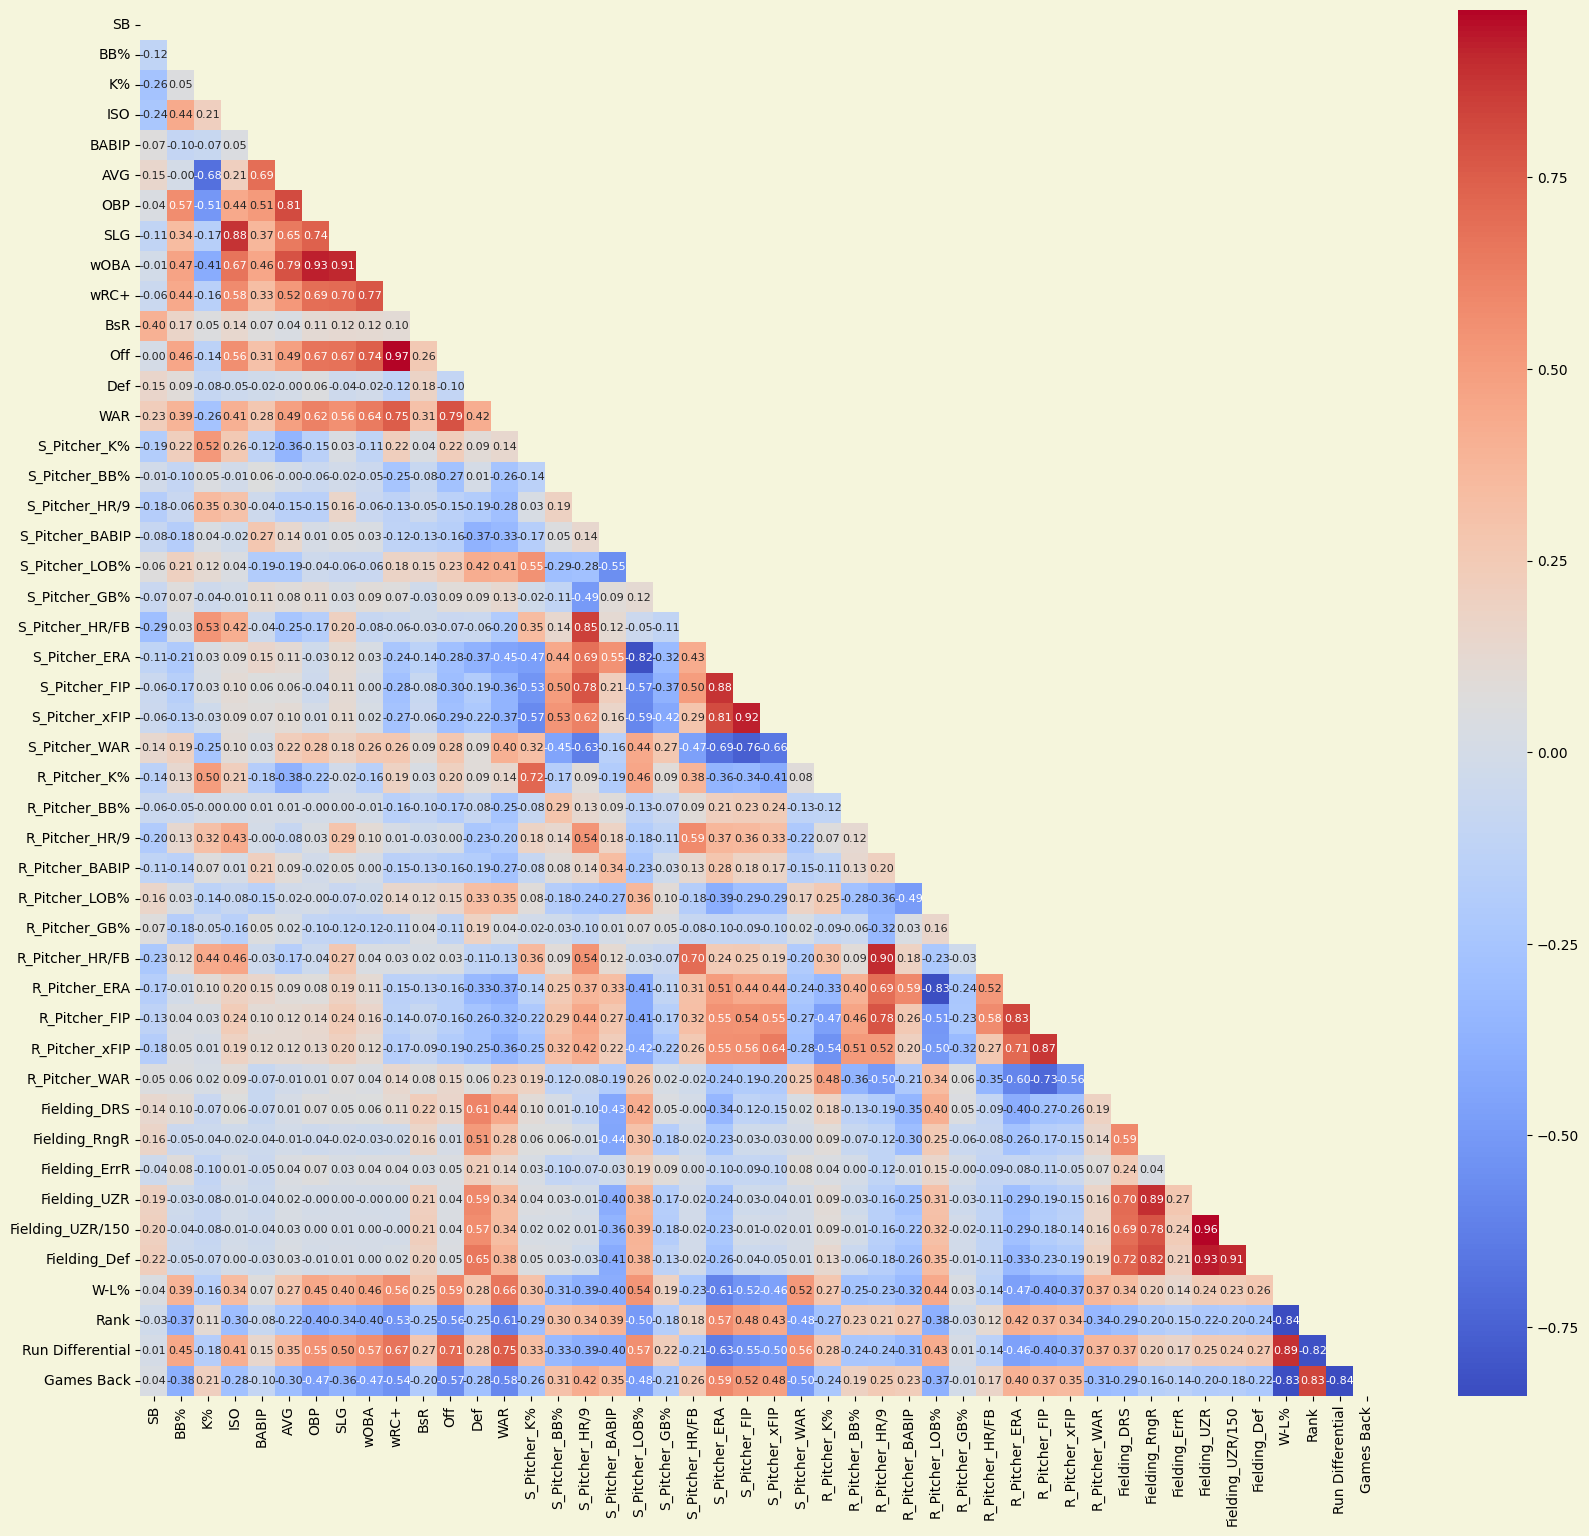

In [16]:
from sklearn.model_selection import train_test_split

# Create a new DataFrame that includes only the independent variables
features = train_data.drop(['Team', 'Season', 'WS_Win', 'League', 'Division'], axis=1)
column_names = features.columns

# Create a ne DataFrame consisting of just the target variable
target = train_data['WS_Win']

# Create train_test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Scale the data
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=column_names)

# Calculate and plot a correlation matrix using a heatmap
cor = X_train.corr()

# Create a mask to display only the lower half of the matrix
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 18))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')

# Create a heatmap
sns.heatmap(
    cor,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=mask,
    square=False,
    cbar=True,
    annot_kws={"size": 8},
)

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">This is a bit clunky to look at, but it gives a good, at a glance idea of what variables are highly correlated to each other. As the next step, let's minimize the amount of features by focusing on the ones from above that had a statistically significant correlation to winning a World Series.</span>
</div>

<Axes: >

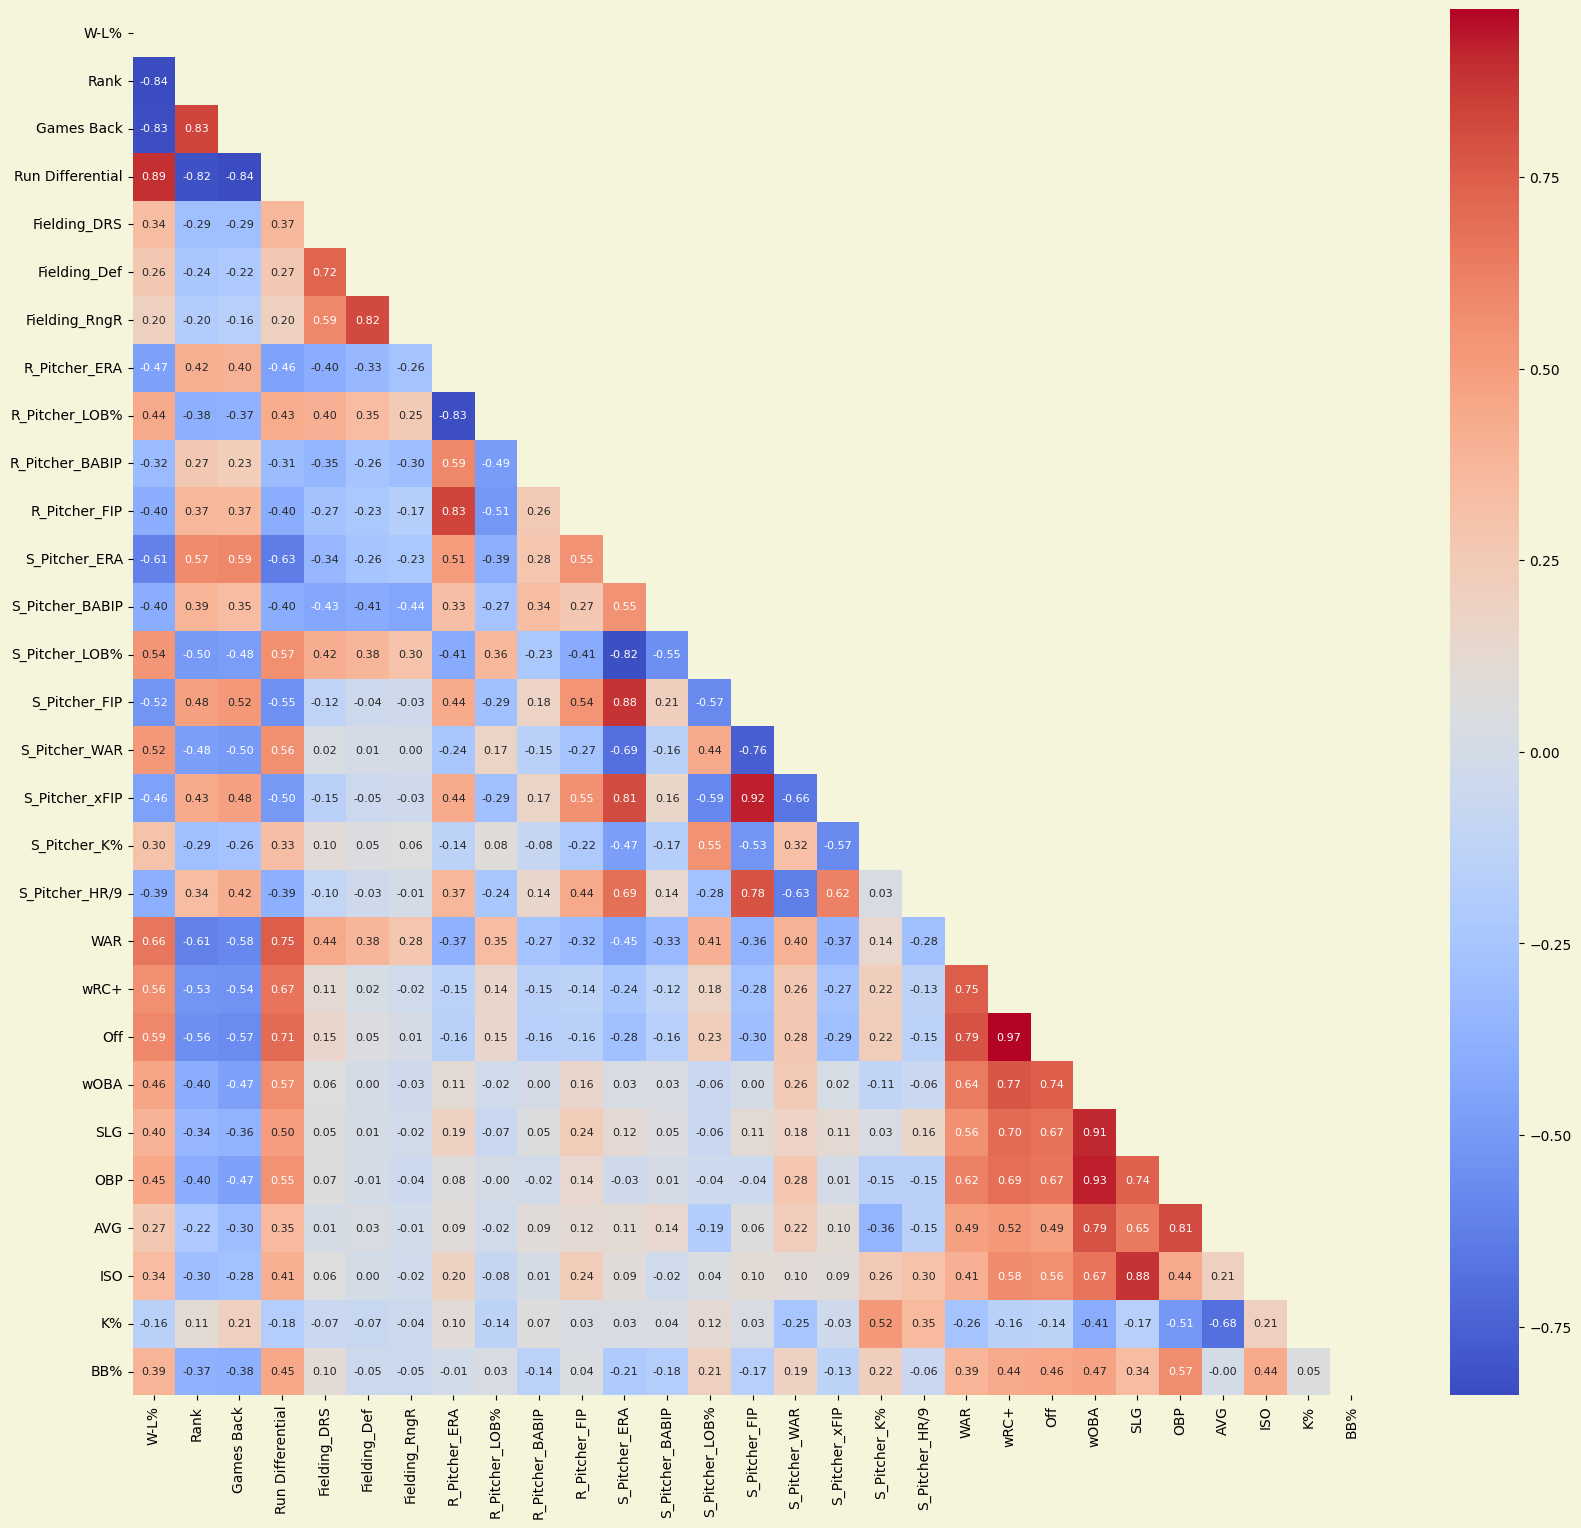

In [17]:
# Let's keep a DataFrame with all of the features to train the random forest and SVM classifier models
X_train_rf_svm = X_train

# Create a DataFrame of the statistically significant features for the logistic regression model
X_train = X_train[['W-L%', 'Rank', 'Games Back', 'Run Differential', 'Fielding_DRS', 'Fielding_Def', 'Fielding_RngR', 'R_Pitcher_ERA', 'R_Pitcher_LOB%', 'R_Pitcher_BABIP', 'R_Pitcher_FIP', 'S_Pitcher_ERA', 'S_Pitcher_BABIP', 'S_Pitcher_LOB%', 'S_Pitcher_FIP', 'S_Pitcher_WAR', 'S_Pitcher_xFIP', 'S_Pitcher_K%', 'S_Pitcher_HR/9', 'WAR', 'wRC+', 'Off', 'wOBA', 'SLG', 'OBP', 'AVG', 'ISO', 'K%', 'BB%']]

# Calculate and plot a correlation matrix using a heatmap
cor = X_train.corr()

# Create a mask to display only the lower half of the matrix
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 18))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')

# Create a heatmap
sns.heatmap(
    cor,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    mask=mask,
    square=False,
    cbar=True,
    annot_kws={"size": 8},
)

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">This heatmap now only includes the independent variables that had a statistically significant correlation. It is now easier to see any occurences of multicollinearity.
    
<br><br>In the coming steps, we will look at the importance of certain variables using techniques such as permutation feature importance and feature importance based off of coefficients in a logistic regression model.</span>
</div>

# Model Selection

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Let's go back to want to we want to model. The model is to predict who is most likely to win the 2023 World Series, and provide the probabilities for each of the 30 teams. The dependent variable is binary: a team either wins or loses the World Series. 

<br><br>With this knowledge, it is identified that this is a binary classification problem, and one in which it should calculate probabilities. The best model choice for this type of problem is a Logistic Regression model. When compared to say a Random Forest Classifier or SVMs, no calibration of the probabilities is generally needed, as Logisitc Regression is inherently a probabilistic model.

<br><br>For Random Forests and SVMs, the predicted probabilities may not align with the true probabilities, and so must be calibrated, usually via Platt scaling or isotonic regression. We will use Platt scaling here, as isotonic regression requires a larger sample size than what we're working with.</span>
</div>

In [18]:
# Let's create an initial Logistic Regression model

from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [19]:
# Let's create an initial Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

# Train a random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf_svm, y_train)

# Implement Platt scaling 
rf_model_platt = CalibratedClassifierCV(rf_model, method='sigmoid')
rf_model_platt.fit(X_train_rf_svm, y_train)

CalibratedClassifierCV(estimator=RandomForestClassifier())

In [20]:
# Let's create an initial SVM classifier

from sklearn.svm import SVC

# Train an initial SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_rf_svm, y_train)

# Implement Platt scaling 
svm_model_platt = CalibratedClassifierCV(svm_model, method='sigmoid')
svm_model_platt.fit(X_train_rf_svm, y_train)

CalibratedClassifierCV(estimator=SVC(kernel='linear', probability=True))

## Feature Importance and Additional Feature Refinement

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Since we've set up an initial Logistic Regression model trained on all of the statistically significant features we found previously, let's use both permutation feature importance and importance based on coeffficients for selecting features for the logistic regression model. We will also take a look at what features LASSO regression retains.
    
<br><br>We will also view feature importances for the random forest model and the SVM model.
    
<br><br>For the random forest and SVM models, we will include all features. Multicollinearity and over-saturation isn’t an issue with random forest models like it is for logistic regression. We can throw in every predictor available and it’ll use what it needs to yield optimal prediction performance. For SVMs, literature suggests their performance is independent of the dimensionality of the feature space, so feature selection may not make the classifier any better.</span>
</div>

### Linear Regression Model Feature Importances

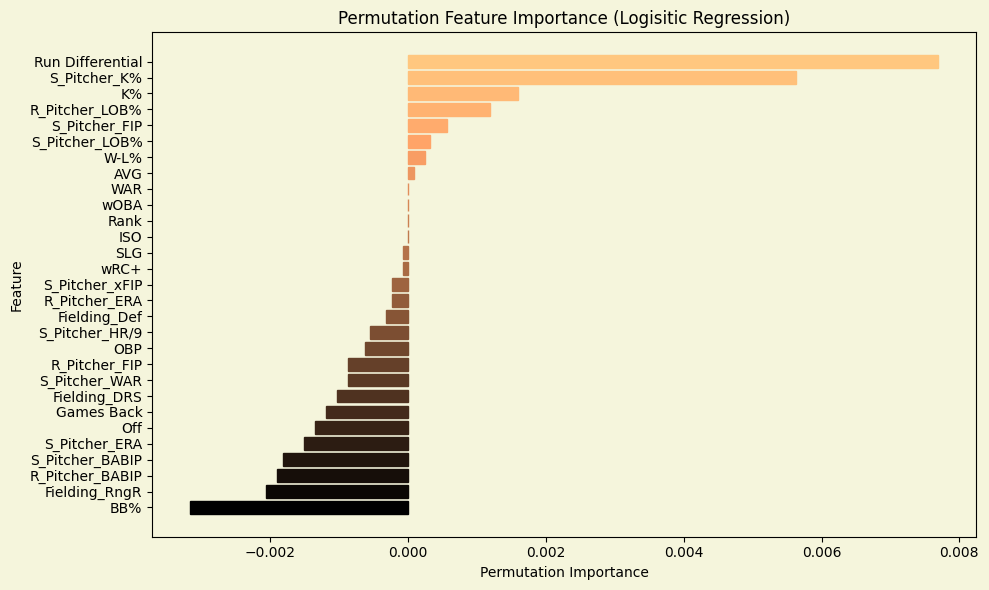

In [21]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance (logistic regression)
perm_importance = permutation_importance(lr_model, X_train, y_train, n_repeats=30, random_state=42)

# Get feature importances
importances = perm_importance.importances_mean

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
bars = plt.barh(range(len(sorted_importances)), sorted_importances[::-1])
plt.ylabel('Feature')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance (Logisitic Regression)')
plt.yticks(range(len(sorted_importances)), reversed(sorted_feature_names))

# Custom colors for the bars
colors = plt.cm.copper(np.linspace(0, 1, len(sorted_importances)))

# Set custom colors for feature labels
for bar, feature_name, color in zip(bars, sorted_feature_names, colors):
    bar.set_label(feature_name)
    bar.set_color(color)
plt.tight_layout()
plt.show()

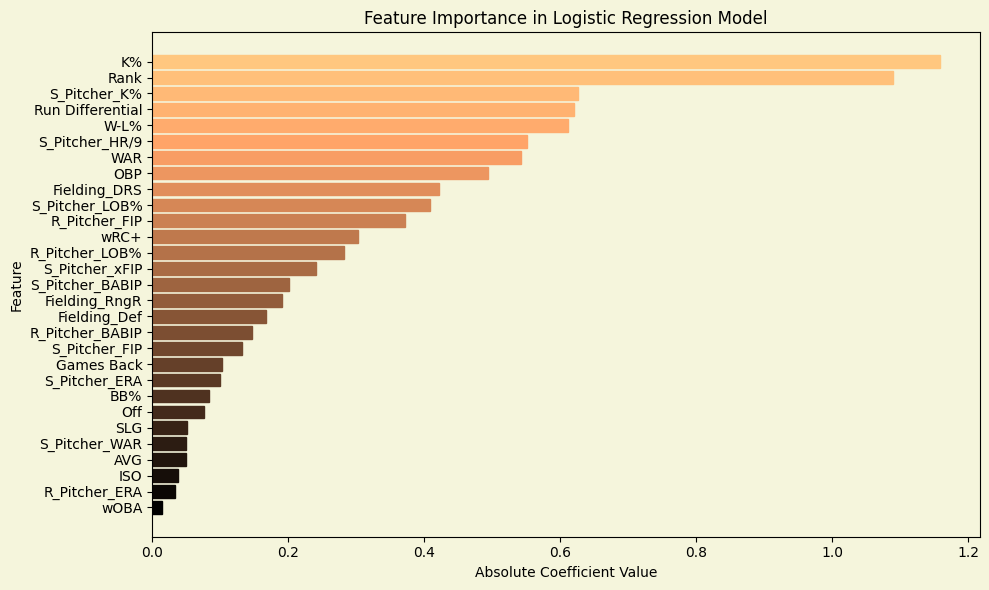

In [22]:
# Get feature coefficients (weights) and their absolute values (logistic regression)
coefficients = lr_model.coef_[0]
abs_coefficients = np.abs(coefficients)

# Sort features by absolute importance
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
bars = ax.barh(range(len(sorted_coefficients)), sorted_coefficients[::-1])
ax.set_ylabel('Feature')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_title('Feature Importance in Logistic Regression Model')
ax.yaxis.tick_left()
plt.yticks(range(len(sorted_coefficients)), reversed(sorted_feature_names))

# Custom colors for the bars
colors = plt.cm.copper(np.linspace(0, 1, len(sorted_coefficients)))

# Set custom colors for feature labels
for bar, feature_name, color in zip(bars, sorted_feature_names, colors):
    bar.set_label(feature_name)
    bar.set_color(color)
plt.tight_layout()
plt.show()

## LASSO Regression for Feature Selection


Selected Feature Names:
Index(['Rank', 'WAR', 'OBP', 'K%'], dtype='object')


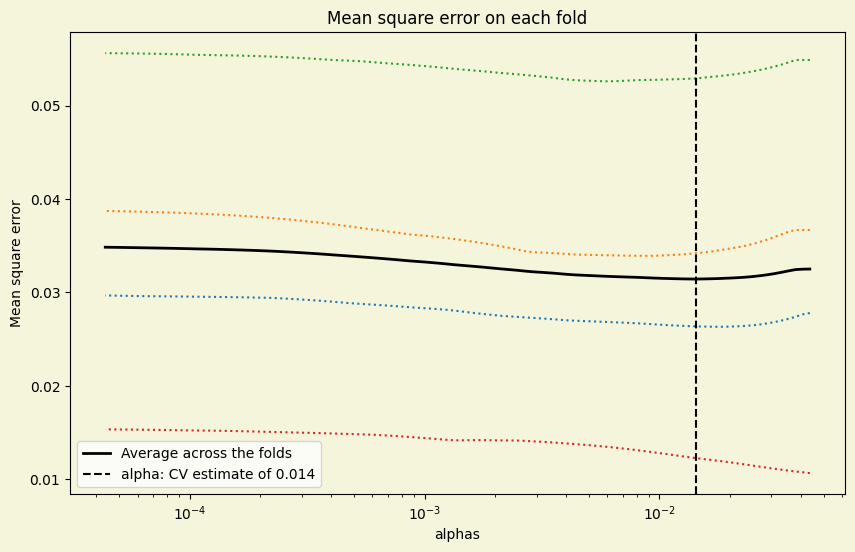

In [23]:
from sklearn.linear_model import LassoCV

# Initialize the LASSO model with cross-validation to find the best alpha
lasso = LassoCV(cv=4, random_state=42, max_iter=10000)

# Fit the model
lasso.fit(X_train, y_train)

# Get the indices of the selected features (coefficients that are not zero)
selected_feature_indices = np.where(lasso.coef_ != 0)[0]

# Get the feature names corresponding to the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Display selected features (both indices and names)
print("\nSelected Feature Names:")
print(selected_feature_names)

fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')

plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="k", label=f"alpha: CV estimate of {lasso.alpha_:.3f}"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")

plt.show()

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Okay, let's take a closer look at these results. From the permutation importance weighted coefficients, and LASSO, it is seen that defense and fielding do not play a huge role in predicting a World Series winner. In both feature importance rankings, the pitching and offensive stats come out on top. In the end, this is intuitive, since teams that hit the ball more, get on base more, strike out less, and have pitchers that are great at preventing runs from scoring, win games. And if the teams have the stats to show they've kept up good performance all year, that performance will likely spill over into the playoffs.

<br><br>Interestingly, the permuation importance does not rate W-L% or Rank highly, unlike the coefficient weighting. From my domain knowledge of baseball, I know those are very important factors in who will win the World Series, so I will be including them.

<br><br>To continue with feature selections, I will take the top results from these importance lists into consideration for use in the model. From there, more identification of multicollinearity will need to be done, resulting in potentially eliminating more features.
    
<br><br>As mentioned previously, the training data for the random forest and SVM model will ingest all of the features, but let's still take a look at how they weigh features to get a better understanding of how those models are working.</span>
</div>

### Random Forest Feature Importances

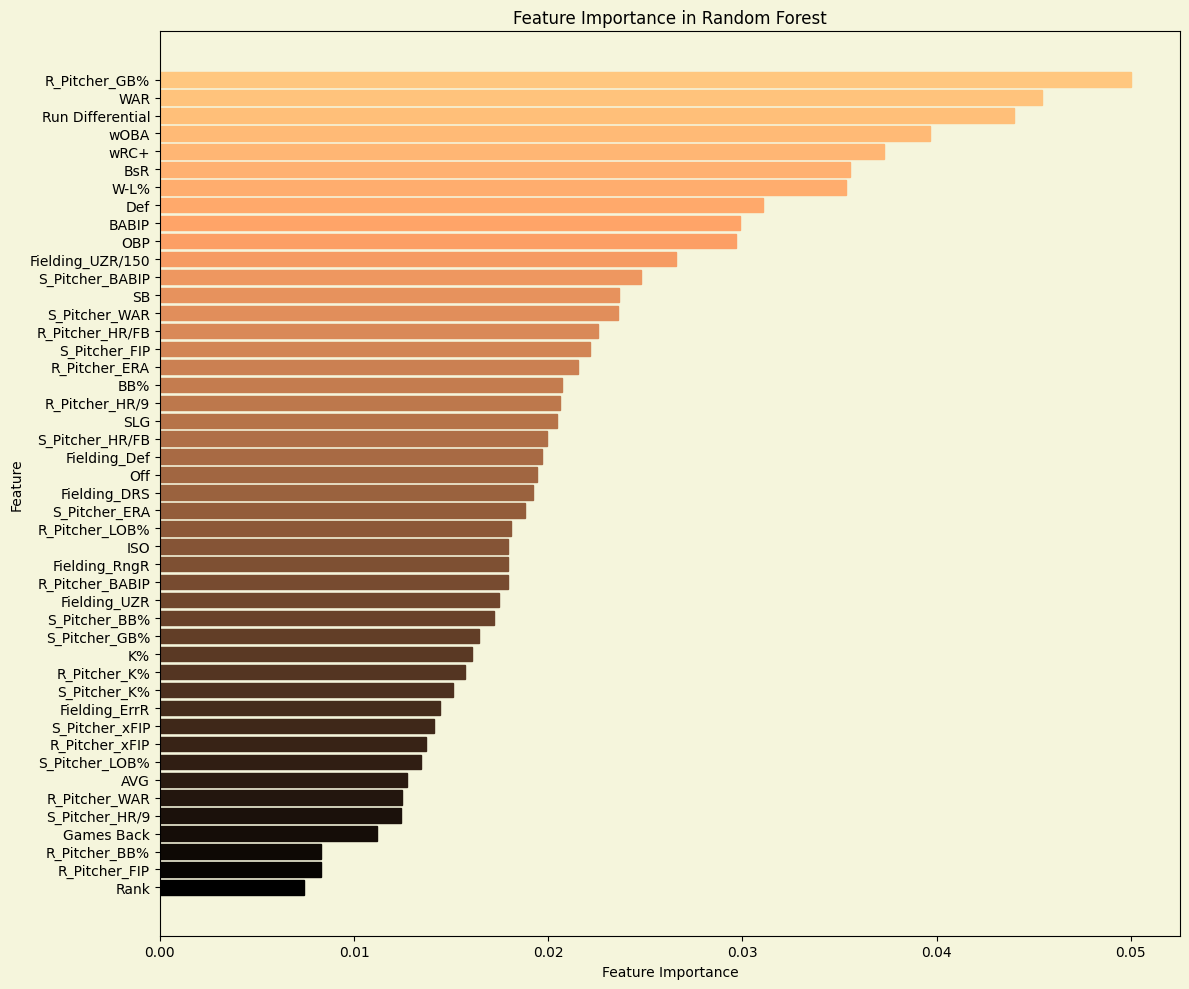

In [24]:
# Get feature importances for Random Forest
feature_importances = rf_model.feature_importances_

# Get the names of the features (assuming you have feature names)
feature_names = X_train_rf_svm.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
bars = ax.barh(range(len(sorted_feature_importances)), sorted_feature_importances[::-1])
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance in Random Forest')
plt.yticks(range(len(sorted_feature_importances)), reversed(sorted_feature_names))
           
# Custom colors for the bars
colors = plt.cm.copper(np.linspace(0, 1, len(sorted_feature_importances)))

# Set custom colors for feature labels
for bar, feature_name, color in zip(bars, sorted_feature_names, colors):
    bar.set_label(feature_name)
    bar.set_color(color)
plt.tight_layout()
plt.show()

### SVM Feature Importance

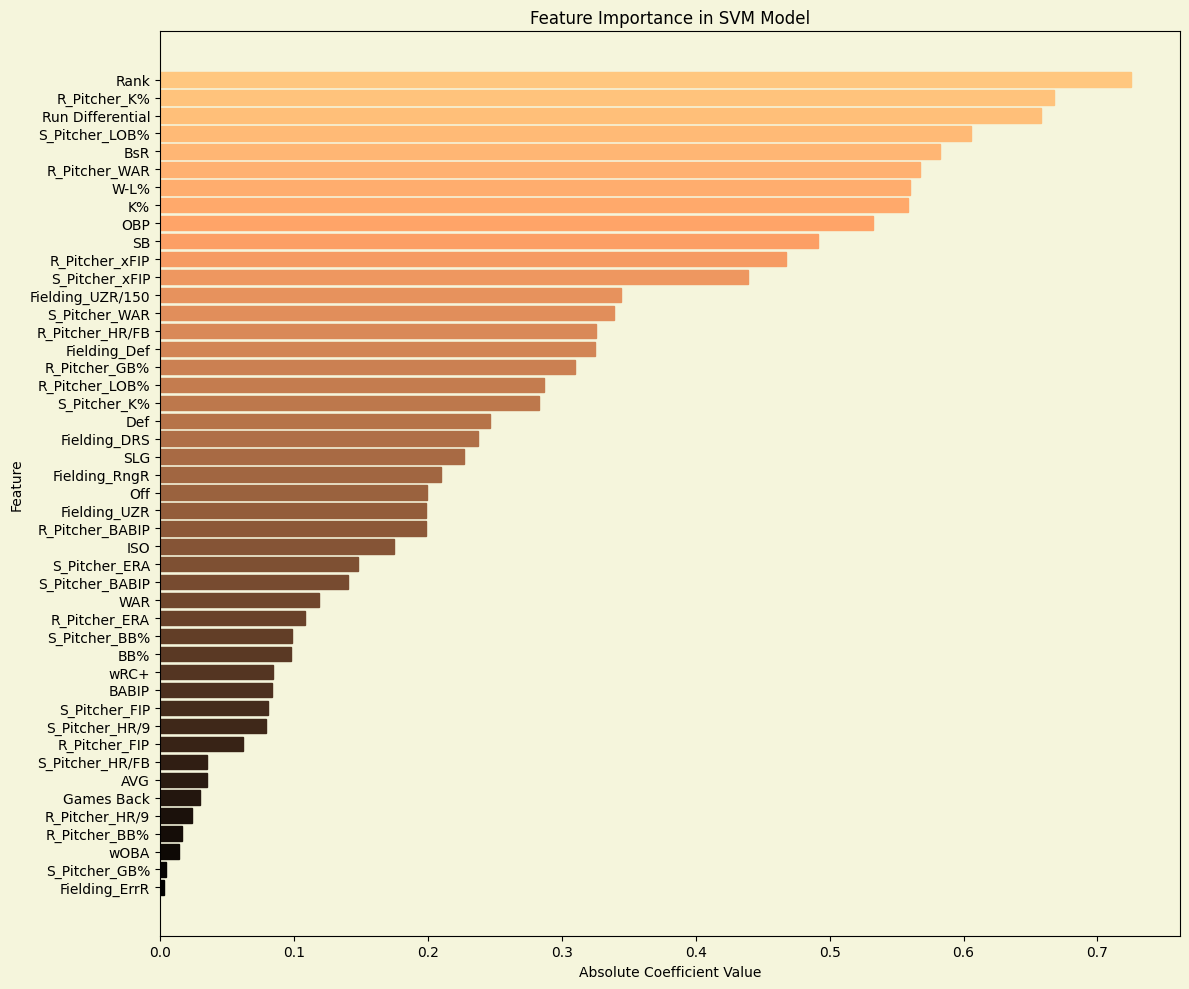

In [25]:
# Get feature coefficients (weights) and their absolute values (SVM)
coefficients = svm_model.coef_[0]
abs_coefficients = np.abs(coefficients)

# Sort features by absolute importance
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_feature_names = X_train_rf_svm.columns[sorted_indices]

# Plot feature importances
fig, ax = plt.subplots(figsize=(12, 10))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
bars = ax.barh(range(len(sorted_coefficients)), sorted_coefficients[::-1])
ax.set_ylabel('Feature')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_title('Feature Importance in SVM Model')
ax.yaxis.tick_left()
plt.yticks(range(len(sorted_coefficients)), reversed(sorted_feature_names))

# Custom colors for the bars
colors = plt.cm.copper(np.linspace(0, 1, len(sorted_coefficients)))

# Set custom colors for feature labels
for bar, feature_name, color in zip(bars, sorted_feature_names, colors):
    bar.set_label(feature_name)
    bar.set_color(color)
plt.tight_layout()
plt.show()

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">As seen above in the heatmap, there are quite a few instances of multicollinearity. That is because some of these stats are saying the same things as each other, just in different ways. This is where, if you have a handle on baseball stats, you can go with which statistic you prefer. Let's eliminate some of these uneccessary features. In general, aiming to eliminate correlations greater than abs(0.7). The features chosen to be removed will mainly be done through domain knowledge. For example, Off and wRC+, which have a correlation coefficient of 0.97, I will choose Off as it is great at measuring hitting and baserunning.
    
<br><br>Run differential, W-L% and Rank have a high correlation to each other, but I will only include Run differential and W-L% as features for the model. For instance, if there is a division, such as the NL or AL Central, where all teams perform poorly, being ranked first in that division does not mean much across the entire MLB, as a team could still have a low winning% yet be in 1st place in the division. Same goes for a division where all the teams are good. A team could be ranked last, but their overall winning% would still mark them as a better team than a team that is ranked higher in a worse division. Rank, overall, is a great indicator of if a team will make the playoffs, and can be used to supplement W-L% metrics to give a more complete picture of teams performance league-wide and division-wide.
    
<br><br>Run differential does a great job at capturing a teams overall performance. Even though it has a high correlation with W-L% and Off, it should be included in the model as well since good teams will have a large run differential. This can help identify anomolies, such as the 2023 San Diego Padres, who have a losing W-L%, but +90 run differential. They are a better performing team than some with a winning W-L%</span>
</div>

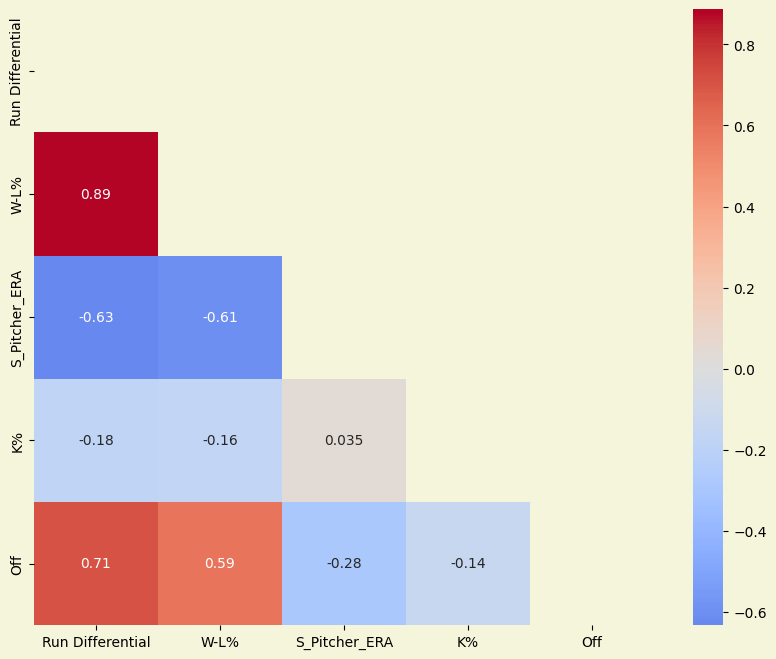

In [26]:
# Create list of final features for training the linear regression model

final_selections = ['Run Differential', 'W-L%', 'S_Pitcher_ERA', 'K%', 'Off']
X_train = X_train[final_selections]
X_test = X_test[final_selections]

# Calculate correlation matrix and visualize it
corr_matrix = X_train.corr()

# Create a mask to display only the lower half of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.show()

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Let's look at the features from a different perspective. The below scatter matrix shows the different scatterplots between features as another way to visualize correlation, and histograms to show the distribution of the different independent variables.

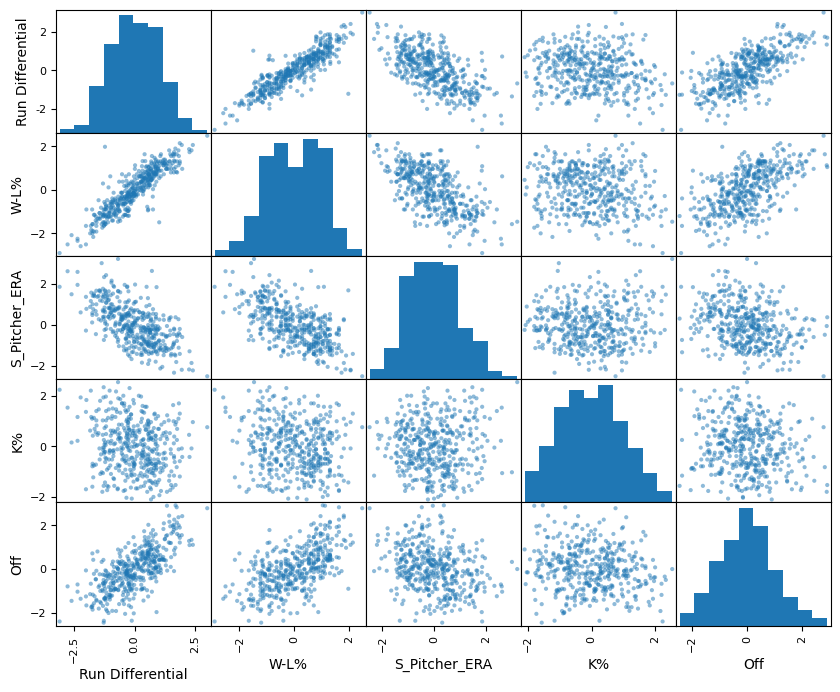

In [27]:
from pandas.plotting import scatter_matrix

#pd.plotting.scatter_matrix(X_train.drop('Rank', axis=1), figsize=(20, 18))
pd.plotting.scatter_matrix(X_train, figsize=(10, 8))
plt.show()

# Cross-Validation of the Three Models

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Before we start looking at the model performance with the separate test data that we split apart at the beginning of this anaylsis, let's perform cross-validation on our training set to help choose the model to proceed with. 

<br><br>We will use the K-fold cross-validation provided by cross_val_score. For the 'cv' parameter, we will set this to four. With cv=4, this means we want to perform 4-fold cross-validation. The data will be divided into four folds, and the model is trained and evaluated four times. Each time, one fold is used for validation, and the remaining folds are used for training.

<br><br>We will use cv=4 since, as we saw above, we have a (small) sample size of 600 that was broken into a training and test set, with the training set sample size being equal to 0.7x600 = 420. Using cv=4 allows us to use a K that is a divisor of the training set sample size. This means we will have four folds of data with each having a sample size of 105. If K is too large, only a low number of sample combinations are possible, limiting the number of iterations that are different.

<br><br>The cross-validation below will calculate the AUC score. The AUC score will be described in more detail below in the "Model Performance" section. For now, we just need to know that it is a decent metric for binary classification models with imbalanced data and that the closer the score is to 1, the better.</span>
</div>

In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and calculate AUC-ROC (Logistic Regression)
cv_auc_roc_lr = cross_val_score(lr_model, X_train, y_train, cv=4, scoring='roc_auc')

# Print the AUC-ROC scores for each split
print("ROC-AUC scores:", cv_auc_roc_lr)
print("Mean ROC-AUC:", np.mean(cv_auc_roc_lr))

ROC-AUC scores: [0.90522876 0.9379085  0.84405941 0.85148515]
Mean ROC-AUC: 0.8846704523393516


In [29]:
# Perform cross-validation and calculate AUC-ROC (Random Forest)
cv_auc_roc_rf = cross_val_score(rf_model_platt, X_train_rf_svm, y_train, cv=4, scoring='roc_auc')

# Print the AUC-ROC scores for each split
print("ROC-AUC scores:", cv_auc_roc_rf)
print("Mean ROC-AUC:", np.mean(cv_auc_roc_rf))

ROC-AUC scores: [0.79084967 0.79738562 0.61881188 0.70792079]
Mean ROC-AUC: 0.7287419918462434


In [30]:
# Perform cross-validation and calculate AUC-ROC (SVM)
cv_auc_roc_svm = cross_val_score(svm_model_platt, X_train_rf_svm, y_train, cv=4, scoring='roc_auc')

# Print the AUC-ROC scores for each split
print("ROC-AUC scores:", cv_auc_roc_svm)
print("Mean ROC-AUC:", np.mean(cv_auc_roc_svm))

ROC-AUC scores: [0.91176471 0.87581699 0.76980198 0.81930693]
Mean ROC-AUC: 0.8441726525593736


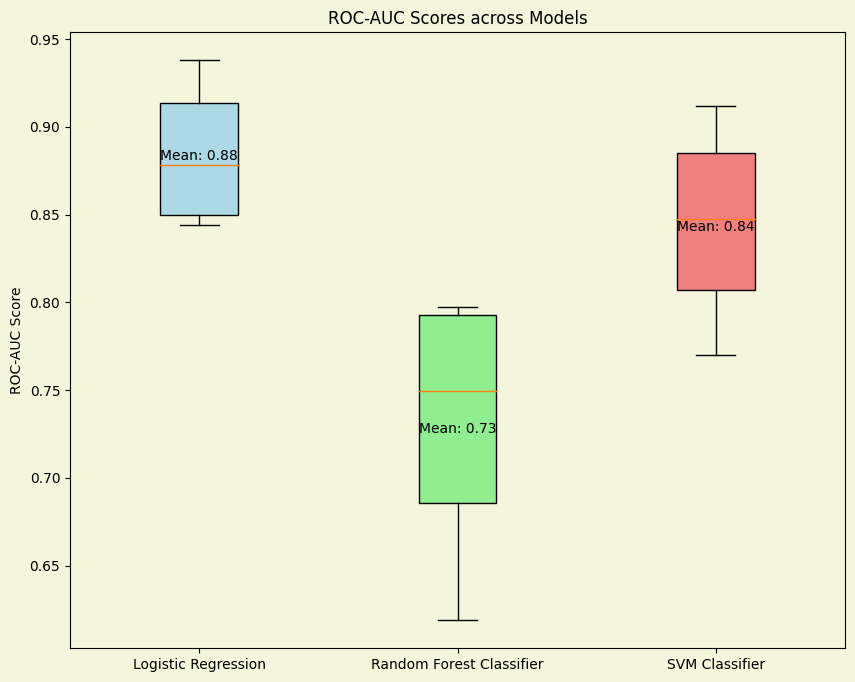

In [31]:
# Create a list of data for all box plots
data = [cv_auc_roc_lr, cv_auc_roc_rf, cv_auc_roc_svm]

# Create labels for the box plots (e.g., model names or scenario names)
labels = ['Logistic Regression', 'Random Forest Classifier', 'SVM Classifier']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')

# Create the box plots
boxplot = ax.boxplot(data, labels=labels, patch_artist=True)

# Customize the box plot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set labels and title
plt.xlabel('')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores across Models')

# Add mean ROC-AUC as text annotations
for i, label in enumerate(labels):
        plt.text(i + 1, np.mean(data[i]) - 0.005, f"Mean: {np.mean(data[i]):.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">AUC-ROC scores for each fold can be seen in the text outputs above. The mean scores for each model are display in the box plot.

<br><br>For the logistic regression model, the ROC-AUC scores show relatively consistent performance across the different folds. Fold 2 has the highest ROC-AUC score (0.934), indicating the best performance on that specific subset of the data during cross-validation, but as seen in the box plot this is an outlier, suggesting the model performed very well on that specific subset of data.

<br><br>The mean AUC-ROC of 0.88 for the logistic regression model suggests that, on average, the model performs reasonably well across the different folds, and it performs better than the random forest classifier and the SVM classifier.
    
<br><br>Also seen from the box plot is that the mean AUC scores for the random forest classifier and the SVM classifier are both lower than the Linear Regression model. Based on the results of the cross-validation, we will proceed to use the Linear Regression model as the final model due to having the highest average AUC score.</span>
</div>

# Logistic Regression Model Performance on the Test Set

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Now, we assess the performance of our trained logistic regression model using the dedicated test dataset. We'll look at two metrics for evaluation: accuracy, which provides an overall measure of correct predictions, and AUC (Area Under the ROC Curve), offering insights into the model's ability to distinguish between classes. By reviewing these metrics, we can gain a better understanding of the model's predictive capabilities, especially when the new, real-world data will be ingested by it.</span>
</div>

## Accuracy Score

In [32]:
from sklearn.metrics import accuracy_score

final_lr_model = LogisticRegression(max_iter=5000)
final_lr_model.fit(X_train, y_train)

# Calculate accuracy score of the logistic regression model using the train/test split
y_pred = final_lr_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_pred, y_test)
print(logistic_regression_accuracy)

0.9611111111111111


<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">The Logistic Regression model achieved a really good accuracy score of approximately 96% on the test data. However, we need to consider the imbalanced data set, especially when dealing with a classification problem where positive results are so few.

<br><br>Accuracy, as a metric, represents the proportion of correctly classified instances out of the total instances. In this case, it is encouraging to observe such a high accuracy, but that's not the whole story. Due to the high number of negatives (not winning the World Series), it is quite easy to see why the accuracy score is so high. In scenarios where the positive class (minority) is significantly outnumbered by the negative class (majority), the model can achieve high accuracy by predominantly predicting the negative class. If, for instance, only a few instances belong to the positive class, the model may correctly predict most of the negatives but perform poorly in identifying the positives.

<br><br>To gain a deeper understanding of the model's performance, we will look at an additional evaluation metric, one that can be relevant to dealing with  imbalanced datasets: the Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC).</span>
</div>

## Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">The ROC curve is a graphical representation that illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) as the discrimination threshold is varied. It plots sensitivity (y-axis) against 1-specificity (x-axis), where each point on the curve corresponds to a different threshold for classifying the positive class. 

<br><br>The AUC is a metric derived from the ROC curve. It quantifies the overall ability of the model to distinguish between the classes (in this case winning the world series or not). AUC represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. AUC ranges from 0 to 1, where 0.5 indicates a model with no discriminatory power (random guessing), and 1 represents a perfect classifier. </span>
</div>

AUC Score: 0.8515325670498085


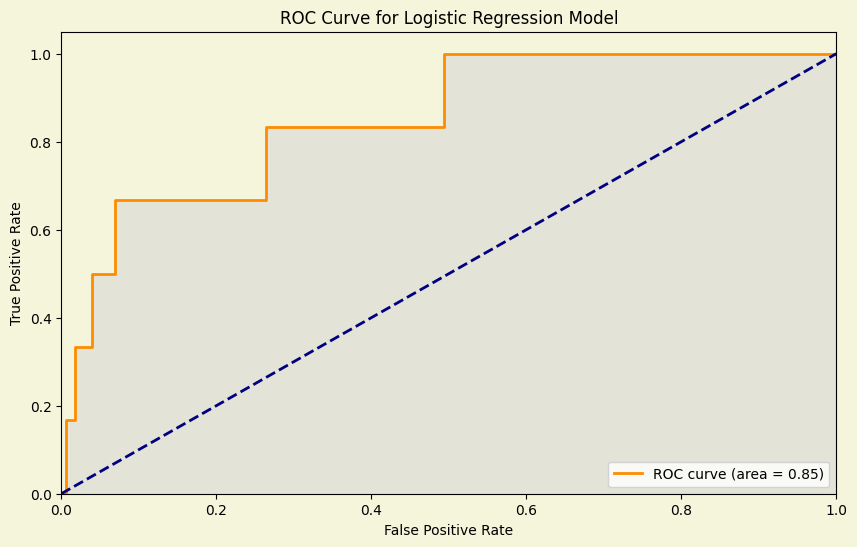

In [33]:
from sklearn.metrics import roc_auc_score

predicted_probabilities = final_lr_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predicted_probabilities)
print("AUC Score:", auc)

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with shading and smooth lines
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightgray', alpha=0.5)  # Shade the area under the curve

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">The AUC score is a measure of how well the model distinguishes between the two classes. An AUC score of 0.85 is an indication that the model has a good level of discriminatory ability to identify World Series winners. This AUC score is around the cross-validation mean score calculated previously, indicating the model's ability to generalize well to unseen data.

<br><br>The ROC curve provides a visual representation of the model's ability to discriminate between the classes across different thresholds. Here, the curve is drawn in orange. The curve's proximity to the top-left corner of the plot demonstrates the model's efficiency in correctly identifying positive instances while minimizing false positives.

<br><br>The light gray shaded area under the ROC curve represents the AUC, highlighting the classifying ability of the model. The larger the shaded area, the better the model is at distinguishing between the classes.</span>
</div>

1. ## Capturing the Latest 2023 Data to Predict the World Series Winner

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Now that we appear to have a model with an acceptable AUC score, and thus decent predictive capabilities, let's move on to capturing the data we really want to test: the latest 2023 FanGraphs data.

<br><br>In order to do this, a web scraping function was written to capture the data, clean it, and organize it into a DataFrame to be identical to the training data.</span>
</div>

In [34]:
############ DO NOT EDIT ############

# This code defines a web scraping function to capture and clean FanGraphs data

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

def fg_scrape(team, years):
# Define the dictionary to map team names to team IDs for FANGRAPHS URL
    mlb_teams = {
        'Arizona Diamondbacks': 'diamondbacks',
        'Atlanta Braves': 'braves',
        'Baltimore Orioles': 'orioles',
        'Boston Red Sox': 'red-sox',
        'Chicago Cubs': 'cubs',
        'Chicago White Sox': 'white-sox',
        'Cincinnati Reds': 'reds',
        'Cleveland Guardians': 'guardians',
        'Colorado Rockies': 'rockies',
        'Detroit Tigers': 'tigers',
        'Houston Astros': 'astros',
        'Kansas City Royals': 'royals',
        'Los Angeles Angels': 'angels',
        'Los Angeles Dodgers': 'dodgers',
        'Miami Marlins': 'marlins',
        'Milwaukee Brewers': 'brewers',
        'Minnesota Twins': 'twins',
        'New York Mets': 'mets',
        'New York Yankees': 'yankees',
        'Oakland Athletics': 'athletics',
        'Philadelphia Phillies': 'phillies',
        'Pittsburgh Pirates': 'pirates',
        'San Diego Padres': 'padres',
        'San Francisco Giants': 'giants',
        'Seattle Mariners': 'mariners',
        'St. Louis Cardinals': 'cardinals',
        'Tampa Bay Rays': 'rays',
        'Texas Rangers': 'rangers',
        'Toronto Blue Jays': 'blue-jays',
        'Washington Nationals': 'nationals'
    }

########### Capture Fangraphs tables for MLB team in a season ###########

    # Construct the URL
    base_url = 'https://www.fangraphs.com/teams/{}/stats?season={}'

    while True:
        url = base_url.format(team, years)
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        try:
            fg_table = soup.find_all('table')

            if not fg_table:
                    print(f"No table found for Team: {team}, Year: {years}")
                    time.sleep(3)
            else:
                # Extract hitting data
                df_hitting = pd.read_html(str(fg_table[8]))[0]
                df_hitting = df_hitting.iloc[:, 5:]
                df_hitting = df_hitting.iloc[-1:]
                #columns_to_remove = ['AVG', 'OBP', 'SLG', 'wOBA']
                #df_hitting = df_hitting.drop(columns=columns_to_remove)
                #df_hitting.columns = ['FG_Batter_' + col for col in df_hitting.columns]
                df_hitting = df_hitting.applymap(lambda x: x.replace('%', '') if isinstance(x, str) else x)
                df_hitting = df_hitting.reset_index(drop=True)

                # Extract team name from the h1 tag
                team_name = soup.find('h1', class_='team-name').text.strip()

                # Extract the year from the team name using regular expression
                season = re.search(r'\d{4}', team_name).group()

                # Remove the year information
                team_name = re.sub(r'\d', '', team_name).strip()

                df_hitting.insert(0, 'Team', team_name)
                df_hitting.insert(1, 'Season', season)

####################### Extract Fangraphs pitching data ##########################

                df_spitcher = pd.read_html(str(fg_table[9]))[0]
                df_spitcher = df_spitcher.iloc[:, 5:]
                df_spitcher = df_spitcher.iloc[-1:]
                df_spitcher.columns = ['S_Pitcher_' + col for col in df_spitcher.columns]
                df_spitcher = df_spitcher.applymap(lambda x: x.replace('%', '') if isinstance(x, str) else x)
                df_spitcher = df_spitcher.reset_index(drop=True)

############### Extract Fangraphs relief pitcher data ####################

                df_rpitcher = pd.read_html(str(fg_table[10]))[0]
                df_rpitcher = df_rpitcher.iloc[:, 5:]
                df_rpitcher = df_rpitcher.iloc[-1:]
                df_rpitcher.columns = ['R_Pitcher_' + col for col in df_rpitcher.columns]
                df_rpitcher = df_rpitcher.applymap(lambda x: x.replace('%', '') if isinstance(x, str) else x)
                df_rpitcher = df_rpitcher.reset_index(drop=True)

############### Extract Fangraphs defense data ####################

                df_defense = pd.read_html(str(fg_table[11]))[0]
                df_defense = df_defense.iloc[-1:]
                df_defense = df_defense[['DRS', 'RngR', 'ErrR', 'UZR', 'UZR/150', 'Def']]
                df_defense.columns = ['Fielding_' + col for col in df_defense.columns]
                df_defense = df_defense.reset_index(drop=True)

            # Combine the hitting pitching, and defense dataframes into a single dataframe
                combined_data = pd.concat([df_hitting, df_spitcher, df_rpitcher, df_defense], axis=1)

                return combined_data

        except Exception as e:
            print(f"Error: Could not extract the desired table for Team: {team}, Year: {years}")
            return None

<div style="border: 1px solid black; background-color: pink; padding: 10px;">
<span style="font-size: 18px;"><strong>NOTE: THIS CODE TO CAPTURE, CLEAN, AND ORGANIZE THE 2023 FANGRAPHS DATA MAY TAKE A FEW MINUTES TO RUN</strong></span>
</div>

In [35]:
############ DO NOT EDIT ############

################## Collect current 2023 FanGraph stats ###################

# Define the dictionary to map team names to team IDs for FANGRAPHS URL
mlb_teams = {
    'Arizona Diamondbacks': 'diamondbacks',
    'Atlanta Braves': 'braves',
    'Baltimore Orioles': 'orioles',
    'Boston Red Sox': 'red-sox',
    'Chicago Cubs': 'cubs',
    'Chicago White Sox': 'white-sox',
    'Cincinnati Reds': 'reds',
    'Cleveland Guardians': 'guardians',
    'Colorado Rockies': 'rockies',
    'Detroit Tigers': 'tigers',
    'Houston Astros': 'astros',
    'Kansas City Royals': 'royals',
    'Los Angeles Angels': 'angels',
    'Los Angeles Dodgers': 'dodgers',
    'Miami Marlins': 'marlins',
    'Milwaukee Brewers': 'brewers',
    'Minnesota Twins': 'twins',
    'New York Mets': 'mets',
    'New York Yankees': 'yankees',
    'Oakland Athletics': 'athletics',
    'Philadelphia Phillies': 'phillies',
    'Pittsburgh Pirates': 'pirates',
    'San Diego Padres': 'padres',
    'San Francisco Giants': 'giants',
    'Seattle Mariners': 'mariners',
    'St. Louis Cardinals': 'cardinals',
    'Tampa Bay Rays': 'rays',
    'Texas Rangers': 'rangers',
    'Toronto Blue Jays': 'blue-jays',
    'Washington Nationals': 'nationals'
}

teams = mlb_teams.values()
years = list(range(2023, 2024))
fg_data_frames = []

for team in teams:
    for year in years:
        team_data = fg_scrape(team, year)

        if team_data is not None:
            fg_data_frames.append(team_data)

fg_data = pd.concat(fg_data_frames, ignore_index=True)

################# Team rank and W-L% ###################

W_L_list = []
rank_list =[]

url_list = [
    'https://www.baseball-reference.com/teams/ARI/',
    'https://www.baseball-reference.com/teams/ATL/',
    'https://www.baseball-reference.com/teams/BAL/',
    'https://www.baseball-reference.com/teams/BOS/',
    'https://www.baseball-reference.com/teams/CHW/',
    'https://www.baseball-reference.com/teams/CHC/',
    'https://www.baseball-reference.com/teams/CIN/',
    'https://www.baseball-reference.com/teams/CLE/',
    'https://www.baseball-reference.com/teams/COL/',
    'https://www.baseball-reference.com/teams/DET/',
    'https://www.baseball-reference.com/teams/HOU/',
    'https://www.baseball-reference.com/teams/KCR/',
    'https://www.baseball-reference.com/teams/ANA/',
    'https://www.baseball-reference.com/teams/LAD/',
    'https://www.baseball-reference.com/teams/FLA/',
    'https://www.baseball-reference.com/teams/MIL/',
    'https://www.baseball-reference.com/teams/MIN/',
    'https://www.baseball-reference.com/teams/NYY/',
    'https://www.baseball-reference.com/teams/NYM/',
    'https://www.baseball-reference.com/teams/OAK/',
    'https://www.baseball-reference.com/teams/PHI/',
    'https://www.baseball-reference.com/teams/PIT/',
    'https://www.baseball-reference.com/teams/SDP/',
    'https://www.baseball-reference.com/teams/SFG/',
    'https://www.baseball-reference.com/teams/SEA/',
    'https://www.baseball-reference.com/teams/STL/',
    'https://www.baseball-reference.com/teams/TBD/',
    'https://www.baseball-reference.com/teams/TEX/',
    'https://www.baseball-reference.com/teams/TOR/',
    'https://www.baseball-reference.com/teams/WSN/'
]

for url in url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    team_table = soup.find_all('table')[0]

    df1 = pd.read_html(str(team_table))[0].iloc[0]
    df1_dict = df1.to_dict()
    df1_dict = {key: value.replace('\xa0', ' ') if isinstance(value, str) else value for key, value in df1_dict.items()}
    W_L_list.append(df1_dict)

    df2 = pd.read_html(str(team_table))[0]
    df2 = df2[(df2['Year'] >= 2023) & (df2['Year'] <= 2023)]
    df2['Tm'] = df2['Tm'].str.replace('Â', '', regex=False)
    df2 = df2[['Year', 'Tm', 'Finish', 'R', 'RA']]
    df2['Run Differential'] = df2['R'] - df2['RA']
    rank_list.append(df2)

W_L_df = pd.DataFrame(W_L_list)
W_L_df = W_L_df.sort_values(by='Tm', ascending=True).reset_index(drop=True)

rank_df = pd.concat(rank_list, axis=0, ignore_index=True)
rank_df['Rank'] = rank_df['Finish'].str.extract('(\d+)').astype(int)
rank_df = rank_df.sort_values(by='Tm', ascending=True).reset_index(drop=True)

# Add the "Rank" column from rank_df to fg_data
fg_data['W-L%'] = W_L_df['W-L%']
fg_data['Rank'] = rank_df['Rank']
fg_data['Run Differential'] = rank_df['Run Differential']
fg_data['Games Back'] = W_L_df['GB']
fg_data['Games Back'] = fg_data['Games Back'].replace('--', 0)

In [36]:
# Create our new X_test data for use with the model
X_test = fg_data[final_selections]

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Before running the model on the 2023 FanGraphs data, let's retrain the model on the full training set, and not just the train/test split we used when doing the analysis.</span>
</div>

In [37]:
# Create new training data utilizing the whole training set
X_train = train_data[final_selections]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = train_data['WS_Win']

In [38]:
# Predict probabilities using the trained classifier
final_lr_model = final_lr_model.fit(X_train, y_train)
y_pred = final_lr_model.predict_proba(X_test)

In [39]:
# Add predicted probabilities to the test data
fg_data['Prob of not Winning WS'] = [prob[0] for prob in y_pred]
fg_data['Prob of Winning WS'] = [prob[1] for prob in y_pred]
fg_data = fg_data[['Team', 'Season', 'Prob of Winning WS']]

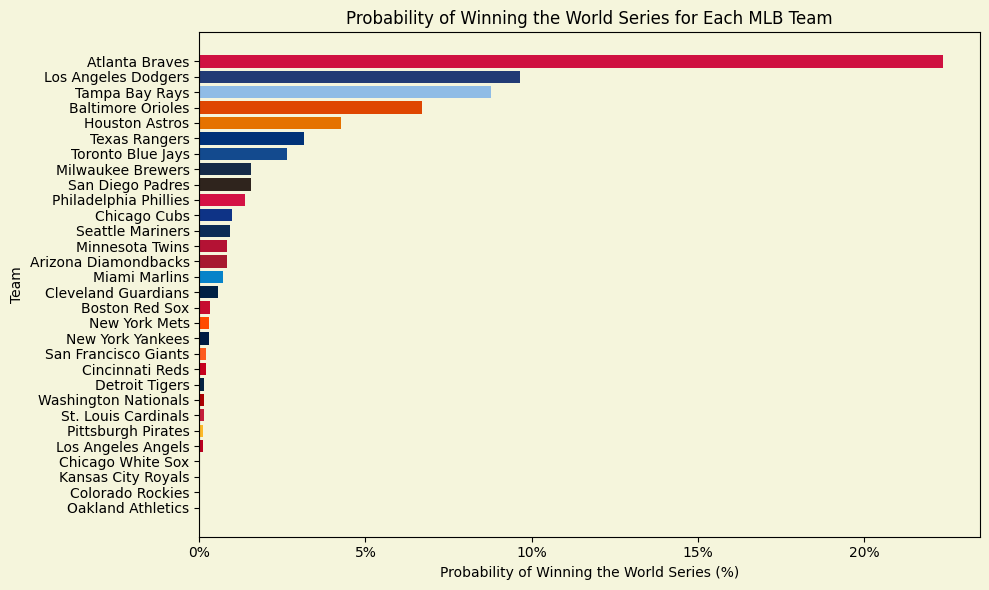

In [40]:
# Visualization

# Dictionary mapping team names to colors
mlb_team_colors = {
    'Arizona Diamondbacks': '#A71930',  # Sedona Red
    'Atlanta Braves': '#CF1141',       # Braves Red
    'Baltimore Orioles': '#DF4601',    # Orange
    'Boston Red Sox': '#C60C30',       # Red Sox Red
    'Chicago White Sox': '#000000',    # Black
    'Chicago Cubs': '#0E3386',         # Cubs Blue
    'Cincinnati Reds': '#C6011F',      # Reds Red
    'Cleveland Guardians': '#002144',  # Navy
    'Colorado Rockies': '#220F5D',     # Rockies Purple
    'Detroit Tigers': '#062343',       # Tigers Navy
    'Houston Astros': '#E57200',       # Astros Orange
    'Kansas City Royals': '#002C74',   # Royals Blue
    'Los Angeles Angels': '#B90020',   # Angels Red
    'Los Angeles Dodgers': '#223B75',  # Dodgers Blue
    'Miami Marlins': '#0783C9',        # Miami Blue
    'Milwaukee Brewers': '#162B48',    # Brewers Gold
    'Minnesota Twins': '#B41234',      # Twins Navy
    'New York Yankees': '#001C43',     # Yankees Navy
    'New York Mets': '#FF4A00',        # Mets Orange
    'Oakland Athletics': '#003831',    # Athletics Green
    'Philadelphia Phillies': '#D41244',# Phillies Red
    'Pittsburgh Pirates': '#FCB827',   # Pirates Gold
    'San Diego Padres': '#2F241D',     # Padres Brown
    'San Francisco Giants': '#FD5A1E', # Giants Orange
    'Seattle Mariners': '#0C2C56',     # Mariners Navy
    'St. Louis Cardinals': '#C41E3A',  # Cardinals Red
    'Tampa Bay Rays': '#8FBCE6',       # Rays Blue
    'Texas Rangers': '#003278',        # Rangers Blue
    'Toronto Blue Jays': '#134A8E',    # Blue Jays Blue
    'Washington Nationals': '#AB0003'  # Nationals Red
}

# Extract teams and probabilities
teams = fg_data['Team']
probabilities = fg_data['Prob of Winning WS']

# Sort teams and probabilities in increasing order
sorted_indices = np.argsort(probabilities)
sorted_teams = [teams[i] for i in sorted_indices]
sorted_probabilities = [probabilities[i] for i in sorted_indices]
sorted_colors = [mlb_team_colors[team] for team in sorted_teams]

# Create a bar plot to visualize probabilities
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('beige')
plt.gca().set_facecolor('beige')
bars = plt.barh(sorted_teams, sorted_probabilities, color=sorted_colors)
plt.xlabel('Probability of Winning the World Series (%)')
plt.ylabel('Team')
plt.title('Probability of Winning the World Series for Each MLB Team')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))
plt.tight_layout()

# Display the plot
plt.show()

# Let's Look at the Results

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">Our model suggests that the Atlanta Braves have the highest probability of winning the 2023 World Series. If you've been following baseball this season, this comes as no surprise. The Braves have easily been the most dominant team in baseball, being the first team to 100 wins and the first team to clinch a postseason spot. 

<br><br>The Braves are followed by the Dodgers, then the Rays, and then the Orioles. Intuitively, these make sense as these teams are going to the postseason and have been dominant. Let's compare our results to FanGraphs odds for who will win the World Series. Their top 4 teams, in order of decreasing odds, are the Braves, Dodgers, Rangers, Astros, Orioles, Blue Jays, and Rays (this may change as there are still a handful of games left to play this season). Our model's results are pretty close with what FanGraphs is predicting. Of course, the way the playoffs are structured and how the league is divided is not considered in our model, so that explains some of the differences.

<br><br>This really starts to show once we get down to the teams with low probabilities of winning, as in this point in the season, some of those teams have 0% odds of making the postseason. But, with the goal to determine who will most likely WIN the World Series, this model is in line with the expected teams at the top.</span>
</div>

# Future Work

<div style="border: 1px solid black; background-color: lightyellow; padding: 10px;">
<span style="font-size: 18px;">This model seems to be a decent predictor of who will win the World Series, and next year the plan is to take weekly snapshots through the season and observe how the probabilities change throughout the season. Figuring out a way to account for what leagues the teams play in and how to incorporate the playoff structure are on the to-do lis to improve the model.

<br><br>Going forward, I want to explore more with the Random Forest and SVM models, and work to further understand how to tune those models, adjust hyperparameters, and select features to increase their AUC scores, hopefully making them even better predictors than the Logistic Regression model.

<br><br>Of course, baseball can be a wild game, with crazy upsets not being uncommon in the postseason. And with the additional Wild Card, the postseason will be even more unpredictable now, increasing the possibility of the lower ranked teams to win it all.

<br><br>Finally, as a San Francisco Giants fan whose team has been eliminated from contention, I support the fellow orange and black team, the Baltimore Orioles.</span>
</div>